# Telco Customer Churn
## Focused customer retention programs
<br>
<br>

Telco Customer Churn Prediction is to measure why customers are leaving Telco Business.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import plotly.express as px
from scipy import stats
from typing import List
import os

In [3]:
print(os.listdir('../project/Telco Customer Churn'))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [4]:
df = pd.read_csv('../project/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5255,8486-AYEQH,Female,0,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,2227.8,No
461,6614-VBEGU,Female,0,Yes,No,24,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),69.45,1614.05,No
1756,0134-XWXCE,Female,1,No,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),74.85,3268.05,No
5974,7094-MSZAO,Male,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.05,218.5,No
3617,3346-BRMIS,Female,1,Yes,No,18,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.35,810.7,Yes
3253,8123-QBNAZ,Female,0,Yes,Yes,36,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),104.50,3684.95,No


In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## **1. Exploratory Data Analysis**

### 1.1 Overview
* `customerID` is the unique id of the row and it doesn't have any effect on target
* `gender` Whether the customer is a male or a female
* `SeniorCitizen` Whether the customer is a senior citizen or not (1, 0)
* `Partner` Whether the customer has a partner or not (Yes, No)
* `Dependents` Whether the customer has dependents or not (Yes, No)
* `Tenure` Number of months the customer has stayed with the company
* `PhoneService` Whether the customer has a phone service or not (Yes, No)
* `MultipleLines` Whether the customer has multiple lines or not (Yes, No, No phone service)
* `InternetService` Customer’s internet service provider (DSL, Fiber optic, No)
* `OnlineSecurity` Whether the customer has online security or not (Yes, No, No internet service)
* `OnlineBackup` Whether the customer has online backup or not (Yes, No, No internet service)
* `DeviceProtection` Whether the customer has device protection or not (Yes, No, No internet service)
* `TechSupport` Whether the customer has tech support or not (Yes, No, No internet service)
* `StreamingTV` Whether the customer has streaming TV or not (Yes, No, No internet service)
* `StreamingMovies` Whether the customer has streaming movies or not (Yes, No, No internet service)
* `Contract` The contract term of the customer (Month-to-month, One year, Two year)
* `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)
* `PaymentMethod` The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* `MonthlyCharges` The amount charged to the customer monthly
* `TotalCharges` The total amount charged to the customer
* `Churn` Whether the customer churned or not (Yes or No)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Show all columns on dataframe
pd.set_option('display.max_columns', None)

#Assign new dataframe
df1 = df.copy()

#Drop customerID
df1.drop('customerID', axis='columns', inplace=True)

### 1.2 Memory Optimization

In [9]:
def optimize_floats(df1: pd.DataFrame) -> pd.DataFrame:
    floats = df1.select_dtypes(include=['float64']).columns.tolist()
    df1[floats] = df1[floats].apply(pd.to_numeric, downcast='float')
    return df1

def optimize_ints(df1: pd.DataFrame) -> pd.DataFrame:
    ints = df1.select_dtypes(include=['int64']).columns.tolist()
    df1[ints] = df1[ints].apply(pd.to_numeric, downcast='integer')
    return df1

def optimize_objects(df1: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df1.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df1[col].unique())
            num_total_values = len(df1[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df1[col] = df1[col].astype('category')
        else:
            df1[col] = pd.to_datetime(df1[col])
    return df1

def optimize(df1: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df1, datetime_features)))

df1 = optimize(df1)

# Converting Senior Citizen to a categorical data type.
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype('category')

# Converting Total Charges to a numerical data type.
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int8    
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

### 1.3 Data Cleaning

In [10]:
#Handling missing value
missing = df1.isnull().sum().sort_values(ascending = False)
non_missing = df1.notnull().sum()
percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
dtypes = df1.dtypes
missing_df = pd.concat([missing, non_missing, percent, dtypes], axis=1, keys=['Missing', 'Non-Missing', 'Percent', 'Dtypes'])
missing_df

,Missing,Non-Missing,Percent,Dtypes
TotalCharges,11,7032,0.156183,float64
gender,0,7043,0.000000,category
SeniorCitizen,0,7043,0.000000,category
MonthlyCharges,0,7043,0.000000,float32
PaymentMethod,0,7043,0.000000,category
PaperlessBilling,0,7043,0.000000,category
Contract,0,7043,0.000000,category
StreamingMovies,0,7043,0.000000,category
StreamingTV,0,7043,0.000000,category
TechSupport,0,7043,0.000000,category


In [11]:
df1[pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,No


In [12]:
#Removing missing values 
df1.dropna(inplace=True)

In [13]:
#Unique values from all columns
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()} \n')

print_unique_col_values(df1)

gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male'] 

SeniorCitizen : [0, 1]
Categories (2, int64): [0, 1] 

Partner : ['Yes', 'No']
Categories (2, object): ['Yes', 'No'] 

Dependents : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

MultipleLines : ['No phone service', 'No', 'Yes']
Categories (3, object): ['No phone service', 'No', 'Yes'] 

InternetService : ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No'] 

OnlineSecurity : ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'Yes', 'No internet service'] 

OnlineBackup : ['Yes', 'No', 'No internet service']
Categories (3, object): ['Yes', 'No', 'No internet service']

In [14]:
#Fix inconsistent data entry
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

In [15]:
print_unique_col_values(df1)

gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male'] 

SeniorCitizen : [0, 1]
Categories (2, int64): [0, 1] 

Partner : ['Yes', 'No']
Categories (2, object): ['Yes', 'No'] 

Dependents : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

MultipleLines : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

InternetService : ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No'] 

OnlineSecurity : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

OnlineBackup : ['Yes', 'No']
Categories (2, object): ['Yes', 'No'] 

DeviceProtection : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

TechSupport : ['No', 'Yes']
Categories (2, object): ['No

### 1.4 Visualization

#### 1.4.1 Churn (Binary Feature, Target Distribution)

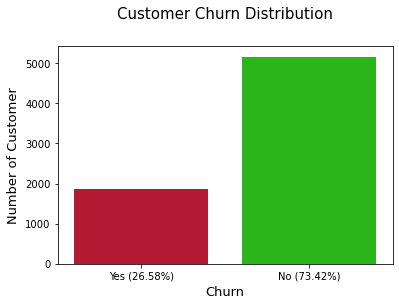



1,869 of 7,032 customers did churn, 26.58% of total customers.
5,163 of 7,032 customers did not churn, 73.42% of total cusomers.


In [16]:
churn_yes = df1['Churn'].value_counts()[1]
churn_no = df1['Churn'].value_counts()[0]
churn_yes_per = churn_yes / df1.shape[0] * 100
churn_no_per = churn_no / df1.shape[0] * 100


#Visualization
with sns.color_palette(['#cf0022', '#18cf00']):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df1['Churn'], order=['Yes', 'No'])
    plt.xlabel('Churn', size=13, labelpad=5)
    plt.ylabel('Number of Customer', size=13, labelpad=5)
    plt.xticks((1, 0), ['No ({0:.2f}%)'.format(churn_no_per), 'Yes ({0:.2f}%)'.format(churn_yes_per)])
    plt.title('Customer Churn Distribution', size=15, y=1.10)

plt.show()


#Summary
print('\n\n{:,} of {:,} customers did churn, {:.2f}% of total customers.'.format(churn_yes, df1.shape[0], churn_yes_per))
print('{:,} of {:,} customers did not churn, {:.2f}% of total cusomers.'.format(churn_no, df1.shape[0], churn_no_per))

#### 1.4.2 Tenure (Continuous Feature)

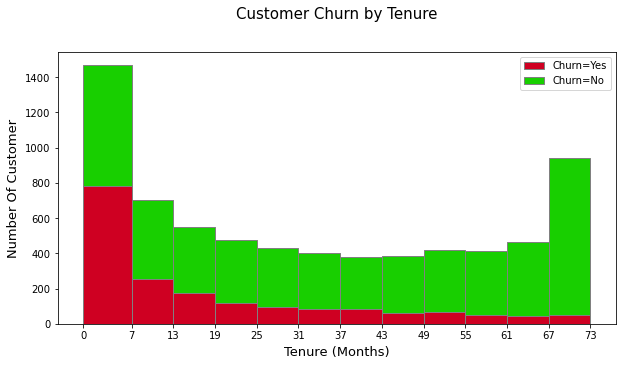

,0-6,7-12,13-18,19-24,25-30,31-36,37-42,43-48,49-54,55-60,61-66,67-72
churn_no,686,452,371,359,337,315,296,321,352,360,420,894
churn_yes,784,253,177,117,94,86,83,62,68,52,43,50
total_cust,1470,705,548,476,431,401,379,383,420,412,463,944
point_difference,-98,199,194,242,243,229,213,259,284,308,377,844
churn_no_perc,13%,9%,7%,7%,7%,6%,6%,6%,7%,7%,8%,17%
churn_yes_perc,42%,14%,9%,6%,5%,5%,4%,3%,4%,3%,2%,3%


,tenure,churn_yes,churn_no
count,7032.000000,1869.000000,5163.00000
mean,32.421786,17.979133,37.65001
std,24.545260,19.531123,24.07694
min,1.000000,1.000000,1.00000
25%,9.000000,2.000000,15.00000
50%,29.000000,10.000000,38.00000
75%,55.000000,29.000000,61.00000
max,72.000000,72.000000,72.00000



Highest customer tenure on 0-6 months / 0-0.5 year (1470 of 7032 customers, 20.9% of total customer)
Lowest customer tenure on 37-42 months / 3-3.5 years (379 of 7032 customers, 5.4% of total customer)
Highest customer did churn on 0-6 months / 0-0.5 year tenure (784 of 1869 customers, 41.9% of total customer did churn)
Highest customer did not churn on 67-72 months / 5.5-6 years tenure (894 of 5163 customers, 17.3% of total customer did not churn)
The customer did churn average is on 13-18 months / 1-1.5 year tenure (18.0) while median is on 7-12 months / 0.5-1 year tenure (10.0).
The customer did not churn average is on 37-42 months / 3-3.5 years tenure (37.7) while median is on is on 37-42 months / 3-3.5 years tenure(38.0).


In [17]:
tc_y = df1[df1.Churn=='Yes'].tenure.reset_index(drop=True)
tc_n = df1[df1.Churn=='No'].tenure.reset_index(drop=True)
tc = pd.concat([df1.tenure, tc_y, tc_n], axis=1)
tc.columns = ['tenure', 'churn_yes', 'churn_no']


#Visualization
with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([tc_y, tc_n], bins=(0, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73), edgecolor='gray', stacked=True)
    ax.set_xticks(bins)
    plt.xlabel('Tenure (Months)', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Tenure', size=15, y=1.10)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()


#Table
tc_yr = tc_y.replace(range(0, 7), '0-6').replace(range(7, 13), '7-12').replace(range(13, 19), '13-18').replace(range(19, 25), '19-24').replace(range(25, 31), '25-30').replace(range(31, 37), '31-36').replace(range(37, 43), '37-42').replace(range(43, 49), '43-48').replace(range(49, 55), '49-54').replace(range(55, 61), '55-60').replace(range(61, 67), '61-66').replace(range(67, 73), '67-72')
tc_nr = tc_n.replace(range(0, 7), '0-6').replace(range(7, 13), '7-12').replace(range(13, 19), '13-18').replace(range(19, 25), '19-24').replace(range(25, 31), '25-30').replace(range(31, 37), '31-36').replace(range(37, 43), '37-42').replace(range(43, 49), '43-48').replace(range(49, 55), '49-54').replace(range(55, 61), '55-60').replace(range(61, 67), '61-66').replace(range(67, 73), '67-72')

tc0 = pd.concat([tc_yr, tc_nr], axis=1)
tc0.columns = ['churn_yes', 'churn_no']

churn_index = ['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-66', '67-72']
tc_yr1 = tc0['churn_yes'].value_counts().reindex(churn_index).to_frame()
tc_nr1 = tc0['churn_no'].value_counts().reindex(churn_index).to_frame()

tc_table = pd.concat([tc_yr1, tc_nr1], axis=1)

tc_table['total_cust'] = (tc_table['churn_yes'] + tc_table['churn_no'])
tc_table['point_difference'] = tc_table['churn_no'] - tc_table['churn_yes']
tc_table['churn_no_perc'] = (tc_table['churn_no']  / tc_table['churn_no'].sum())
tc_table['churn_no_perc'] = tc_table['churn_no_perc'].map("{:.0%}".format)
tc_table['churn_yes_perc'] = (tc_table['churn_yes']  / tc_table['churn_yes'].sum())
tc_table['churn_yes_perc'] = tc_table['churn_yes_perc'].map("{:.0%}".format)

table_index = ['churn_no', 'churn_yes', 'total_cust', 'point_difference', 'churn_no_perc', 'churn_yes_perc']

tc_table = tc_table.transpose().reindex(table_index)

display(tc_table)


#Descriptive Statistics
display(tc.describe())


#Summary
print('\nHighest customer tenure on 0-6 months / 0-0.5 year ({} of {} customers, {:.1%} of total customer)'.format(tc_table.loc['total_cust', '0-6'], tc_table.loc['total_cust'].sum(), tc_table.loc['total_cust', '0-6'] / tc_table.loc['total_cust'].sum()))

print('Lowest customer tenure on 37-42 months / 3-3.5 years ({} of {} customers, {:.1%} of total customer)'.format(tc_table.loc['total_cust', '37-42'], tc_table.loc['total_cust'].sum(), tc_table.loc['total_cust', '37-42'] / tc_table.loc['total_cust'].sum()))

print('Highest customer did churn on 0-6 months / 0-0.5 year tenure ({} of {} customers, {:.1%} of total customer did churn)'.format(tc_table.loc['churn_yes', '0-6'], tc_table.loc['churn_yes'].sum(), tc_table.loc['churn_yes', '0-6'] / tc_table.loc['churn_yes'].sum()))

print('Highest customer did not churn on 67-72 months / 5.5-6 years tenure ({} of {} customers, {:.1%} of total customer did not churn)'.format(tc_table.loc['churn_no', '67-72'], tc_table.loc['churn_no'].sum(), tc_table.loc['churn_no', '67-72'] / tc_table.loc['churn_no'].sum()))

print('The customer did churn average is on 13-18 months / 1-1.5 year tenure ({:.1f}) while median is on 7-12 months / 0.5-1 year tenure ({:.1f}).'.format(tc_y.mean(), tc_y.median()))

print('The customer did not churn average is on 37-42 months / 3-3.5 years tenure ({:.1f}) while median is on is on 37-42 months / 3-3.5 years tenure({:.1f}).'.format(tc_n.mean(), tc_n.median()))

In [18]:
# def count_range_in_list(li, min, max):
# 	ctr = 0
# 	for x in li:
# 		if min <= x < max:
# 			ctr += 1
# 	return ctr

# print(count_range_in_list(tc_y, 43, 49))
# print(count_range_in_list(tc_y, 49, 55))

#### 1.4.3 Monthly Charges (Continuous Feature)

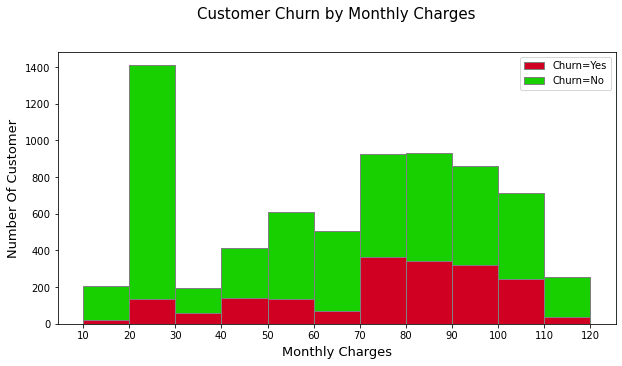

,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,100-109,110-119
churn_no,189,1279,139,277,477,434,558,588,541,465,216
churn_yes,19,133,58,139,135,72,366,344,319,246,38
total_cust,208,1412,197,416,612,506,924,932,860,711,254
point_difference,170,1146,81,138,342,362,192,244,222,219,178
churn_no_perc,4%,25%,3%,5%,9%,8%,11%,11%,10%,9%,4%
churn_yes_perc,1%,7%,3%,7%,7%,4%,20%,18%,17%,13%,2%




Highest customer on 20-29 monthly charges (1412 of 7032 customers, 20.1% of total customer)
Lowest customer on 30-39 monthly charges (197 of 7032 customers, 2.8% of total customer)
Highest customer does churn on 70-79 monthly charges (366 of 1869 customers, 19.6% of total customer does churn)
Highest customer does not churn on 20-29 monthly charges (1279 of 5163 customers, 24.8% of total customer does not churn)
The customer does churn average is on 70-79 monthly charges (74.4) while median is on 80-89 monthly charges (80.0).
The customer does not churn average is on 60-69 monthly charges (61.3) while median is on is on 60-69 monthly charges (64.0).


In [19]:
mcc_y = df1[df1.Churn=='Yes'].MonthlyCharges.reset_index(drop=True).round().astype(int)
mcc_n = df1[df1.Churn=='No'].MonthlyCharges.reset_index(drop=True).round().astype(int)
mcc = pd.concat([mcc_y, mcc_n], axis=1).fillna(0).astype(int)
mcc.columns = ['churn_yes', 'churn_no']


#Visualization
with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([mcc_y, mcc_n], bins=range(10, 121, 10), edgecolor='gray', stacked=True)
    ax.set_xticks(bins)
    plt.xlabel('Monthly Charges', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Monthly Charges', size=15, y=1.10)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()


#Table
mcc_y0 = mcc_y.replace(range(10, 20), '10-19').replace(range(20, 30), '20-29').replace(range(30, 40), '30-39').replace(range(40, 50), '40-49').replace(range(50, 60), '50-59').replace(range(60, 70), '60-69').replace(range(70, 80), '70-79').replace(range(80, 90), '80-89').replace(range(90, 100), '90-99').replace(range(100, 110), '100-109').replace(range(110, 120), '110-119')
mcc_n0 = mcc_n.replace(range(10, 20), '10-19').replace(range(20, 30), '20-29').replace(range(30, 40), '30-39').replace(range(40, 50), '40-49').replace(range(50, 60), '50-59').replace(range(60, 70), '60-69').replace(range(70, 80), '70-79').replace(range(80, 90), '80-89').replace(range(90, 100), '90-99').replace(range(100, 110), '100-109').replace(range(110, 120), '110-119')

mcc0 = pd.concat([mcc_y0, mcc_n0], axis=1)
mcc0.columns = ['churn_yes', 'churn_no']

mcc_index = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
mcc_y1 = mcc0['churn_yes'].value_counts().reindex(mcc_index).to_frame()
mcc_n1 = mcc0['churn_no'].value_counts().reindex(mcc_index).to_frame()

mcc_table = pd.concat([mcc_y1, mcc_n1], axis=1)
mcc_table['total_cust'] = (mcc_table['churn_yes'] + mcc_table['churn_no'])
mcc_table['point_difference'] = mcc_table['churn_no'] - mcc_table['churn_yes']
mcc_table['churn_no_perc'] = (mcc_table['churn_no']  / mcc_table['churn_no'].sum())
mcc_table['churn_no_perc'] = mcc_table['churn_no_perc'].map("{:.0%}".format)
mcc_table['churn_yes_perc'] = (mcc_table['churn_yes']  / mcc_table['churn_yes'].sum())
mcc_table['churn_yes_perc'] = mcc_table['churn_yes_perc'].map("{:.0%}".format)

mcc_table_index = ['churn_no', 'churn_yes', 'total_cust', 'point_difference', 'churn_no_perc', 'churn_yes_perc']
mcc_table = mcc_table.transpose().reindex(mcc_table_index)

display(mcc_table)


#summary
print('\n\nHighest customer on 20-29 monthly charges ({} of {} customers, {:.1%} of total customer)'.format(mcc_table.loc['total_cust', '20-29'], mcc_table.loc['total_cust'].sum(), mcc_table.loc['total_cust', '20-29'] / mcc_table.loc['total_cust'].sum()))

print('Lowest customer on 30-39 monthly charges ({} of {} customers, {:.1%} of total customer)'.format(mcc_table.loc['total_cust', '30-39'], mcc_table.loc['total_cust'].sum(), mcc_table.loc['total_cust', '30-39'] / mcc_table.loc['total_cust'].sum()))

print('Highest customer does churn on 70-79 monthly charges ({} of {} customers, {:.1%} of total customer does churn)'.format(mcc_table.loc['churn_yes', '70-79'], mcc_table.loc['churn_yes'].sum(), mcc_table.loc['churn_yes', '70-79'] / mcc_table.loc['churn_yes'].sum()))

print('Highest customer does not churn on 20-29 monthly charges ({} of {} customers, {:.1%} of total customer does not churn)'.format(mcc_table.loc['churn_no', '20-29'], mcc_table.loc['churn_no'].sum(), mcc_table.loc['churn_no', '20-29'] / mcc_table.loc['churn_no'].sum()))

print('The customer does churn average is on 70-79 monthly charges ({:.1f}) while median is on 80-89 monthly charges ({:.1f}).'.format(mcc_y.mean(), mcc_y.median()))

print('The customer does not churn average is on 60-69 monthly charges ({:.1f}) while median is on is on 60-69 monthly charges ({:.1f}).'.format(mcc_n.mean(), mcc_n.median()))

#### 1.4.4 Total Charges (Continuous Feature)

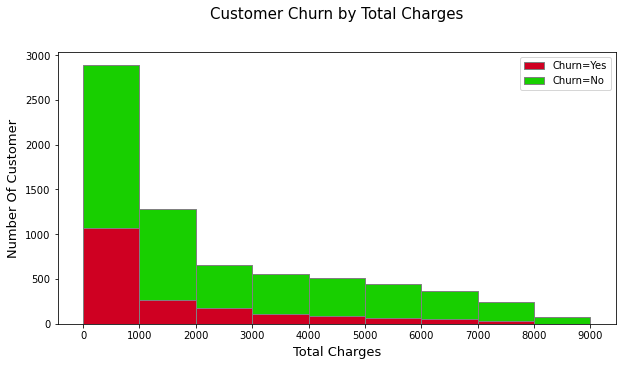

,1-1000,1001-2000,2001-3000,3001-4000,4001-5000,5001-6000,6001-7000,7001-8000,8001-9000
churn_no,1823,1014,471,448,427,372,309,219,75
churn_yes,1070,269,180,107,86,68,55,30,3
total_cust,2893,1283,651,555,513,440,364,249,78
point_difference,753,745,291,341,341,304,254,189,72
churn_no_perc,35%,20%,9%,9%,8%,7%,6%,4%,1%
churn_yes_perc,57%,14%,10%,6%,5%,4%,3%,2%,0%




Highest customer on 1-1,000 total charges (2893 of 7026 customers, 41.2% of total customer)
Lowest customer on 8,001-9,000 monthly charges (78 of 7026 customers, 1.1% of total customer)
Highest customer does churn on 1-1,000 total charges (1070 of 1868 customers, 57.3% of total customer does churn)
Highest customer does not churn on 1-1,000 total charges (1823 of 5158 customers, 35.3% of total customer does not churn)
The customer does churn average is on 1-1,000 total charges (1531.8) while median is on 1-1,000 total charges (704.0).
The customer does not churn average is on 2,001-3,000 total charges (2555.3) while median is on is on 1,001-2,000 total charges (1684.0).


In [20]:
tcc_n = df1[df1.Churn=='No'].TotalCharges.reset_index(drop=True).round().astype(int)
tcc_y = df1[df1.Churn=='Yes'].TotalCharges.reset_index(drop=True).round().astype(int)
tcc = pd.concat([tcc_y, tcc_n], axis=1).fillna(0).astype(int)
tcc.columns = ['churn_yes', 'churn_no']


#Visualization
with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([tcc_y, tcc_n], bins=range(0, 9001, 1000), edgecolor='gray', stacked=True)
    ax.set_xticks(bins)
    plt.xlabel('Total Charges', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Total Charges', size=15, y=1.10)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()



#Table
tcc_y0 = tcc_y.replace(range(0, 1001), '1-1000').replace(range(1001, 2000), '1001-2000').replace(range(2001, 3000), '2001-3000').replace(range(3001, 4000), '3001-4000').replace(range(4001, 5000), '4001-5000').replace(range(5001, 6000), '5001-6000').replace(range(6001, 7000), '6001-7000').replace(range(7001, 8000), '7001-8000').replace(range(8001, 9000), '8001-9000')
tcc_n0 = tcc_n.replace(range(0, 1001), '1-1000').replace(range(1001, 2000), '1001-2000').replace(range(2001, 3000), '2001-3000').replace(range(3001, 4000), '3001-4000').replace(range(4001, 5000), '4001-5000').replace(range(5001, 6000), '5001-6000').replace(range(6001, 7000), '6001-7000').replace(range(7001, 8000), '7001-8000').replace(range(8001, 9000), '8001-9000')

tcc0 = pd.concat([tcc_y0, tcc_n0], axis=1)
tcc0.columns = ['churn_yes', 'churn_no']

tcc_index = ['1-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000', '8001-9000']
tcc_y1 = tcc0['churn_yes'].value_counts().reindex(tcc_index).to_frame()
tcc_n1 = tcc0['churn_no'].value_counts().reindex(tcc_index).to_frame()

tcc_table = pd.concat([tcc_y1, tcc_n1], axis=1)
tcc_table['total_cust'] = (tcc_table['churn_yes'] + tcc_table['churn_no'])
tcc_table['point_difference'] = tcc_table['churn_no'] - tcc_table['churn_yes']
tcc_table['churn_no_perc'] = (tcc_table['churn_no']  / tcc_table['churn_no'].sum())
tcc_table['churn_no_perc'] = tcc_table['churn_no_perc'].map("{:.0%}".format)
tcc_table['churn_yes_perc'] = (tcc_table['churn_yes']  / tcc_table['churn_yes'].sum())
tcc_table['churn_yes_perc'] = tcc_table['churn_yes_perc'].map("{:.0%}".format)

tcc_table_index = ['churn_no', 'churn_yes', 'total_cust', 'point_difference', 'churn_no_perc', 'churn_yes_perc']
tcc_table = tcc_table.transpose().reindex(tcc_table_index)

display(tcc_table)


#summary
print('\n\nHighest customer on 1-1,000 total charges ({} of {} customers, {:.1%} of total customer)'.format(tcc_table.loc['total_cust', '1-1000'], tcc_table.loc['total_cust'].sum(), tcc_table.loc['total_cust', '1-1000'] / tcc_table.loc['total_cust'].sum()))

print('Lowest customer on 8,001-9,000 monthly charges ({} of {} customers, {:.1%} of total customer)'.format(tcc_table.loc['total_cust', '8001-9000'], tcc_table.loc['total_cust'].sum(), tcc_table.loc['total_cust', '8001-9000'] / tcc_table.loc['total_cust'].sum()))

print('Highest customer does churn on 1-1,000 total charges ({} of {} customers, {:.1%} of total customer does churn)'.format(tcc_table.loc['churn_yes', '1-1000'], tcc_table.loc['churn_yes'].sum(), tcc_table.loc['churn_yes', '1-1000'] / tcc_table.loc['churn_yes'].sum()))

print('Highest customer does not churn on 1-1,000 total charges ({} of {} customers, {:.1%} of total customer does not churn)'.format(tcc_table.loc['churn_no', '1-1000'], tcc_table.loc['churn_no'].sum(), tcc_table.loc['churn_no', '1-1000'] / tcc_table.loc['churn_no'].sum()))

print('The customer does churn average is on 1-1,000 total charges ({:.1f}) while median is on 1-1,000 total charges ({:.1f}).'.format(tcc_y.mean(), tcc_y.median()))

print('The customer does not churn average is on 2,001-3,000 total charges ({:.1f}) while median is on is on 1,001-2,000 total charges ({:.1f}).'.format(tcc_n.mean(), tcc_n.median()))

#### 1.4.5 Gender (Binary Feature)

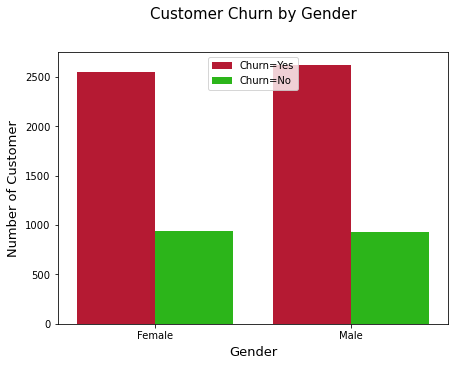

In [22]:
#Visualization
with sns.color_palette(['#cf0022', '#18cf00']):
    plt.figure(figsize=(7, 5))
    sns.countplot(x=df1['gender'], hue='Churn', data=df1)
    plt.xlabel('Gender', size=13, labelpad=5)
    plt.ylabel('Number of Customer', size=13, labelpad=5)
    plt.legend(['Churn=Yes', 'Churn=No'], loc='upper center', prop={'size': 10})
    plt.title('Customer Churn by Gender', size=15, y=1.10)

plt.show()

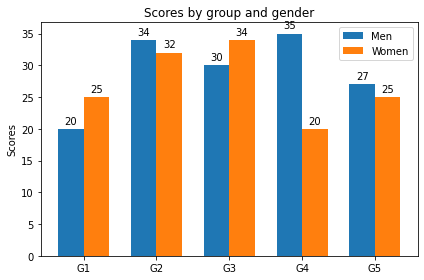

In [31]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [32]:
rects1

<BarContainer object of 5 artists>

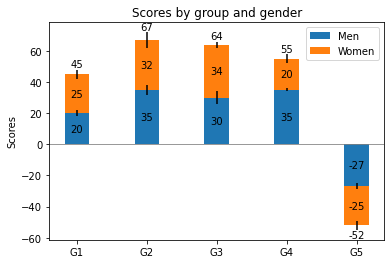

In [24]:
N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

In [30]:
p1

<BarContainer object of 5 artists>

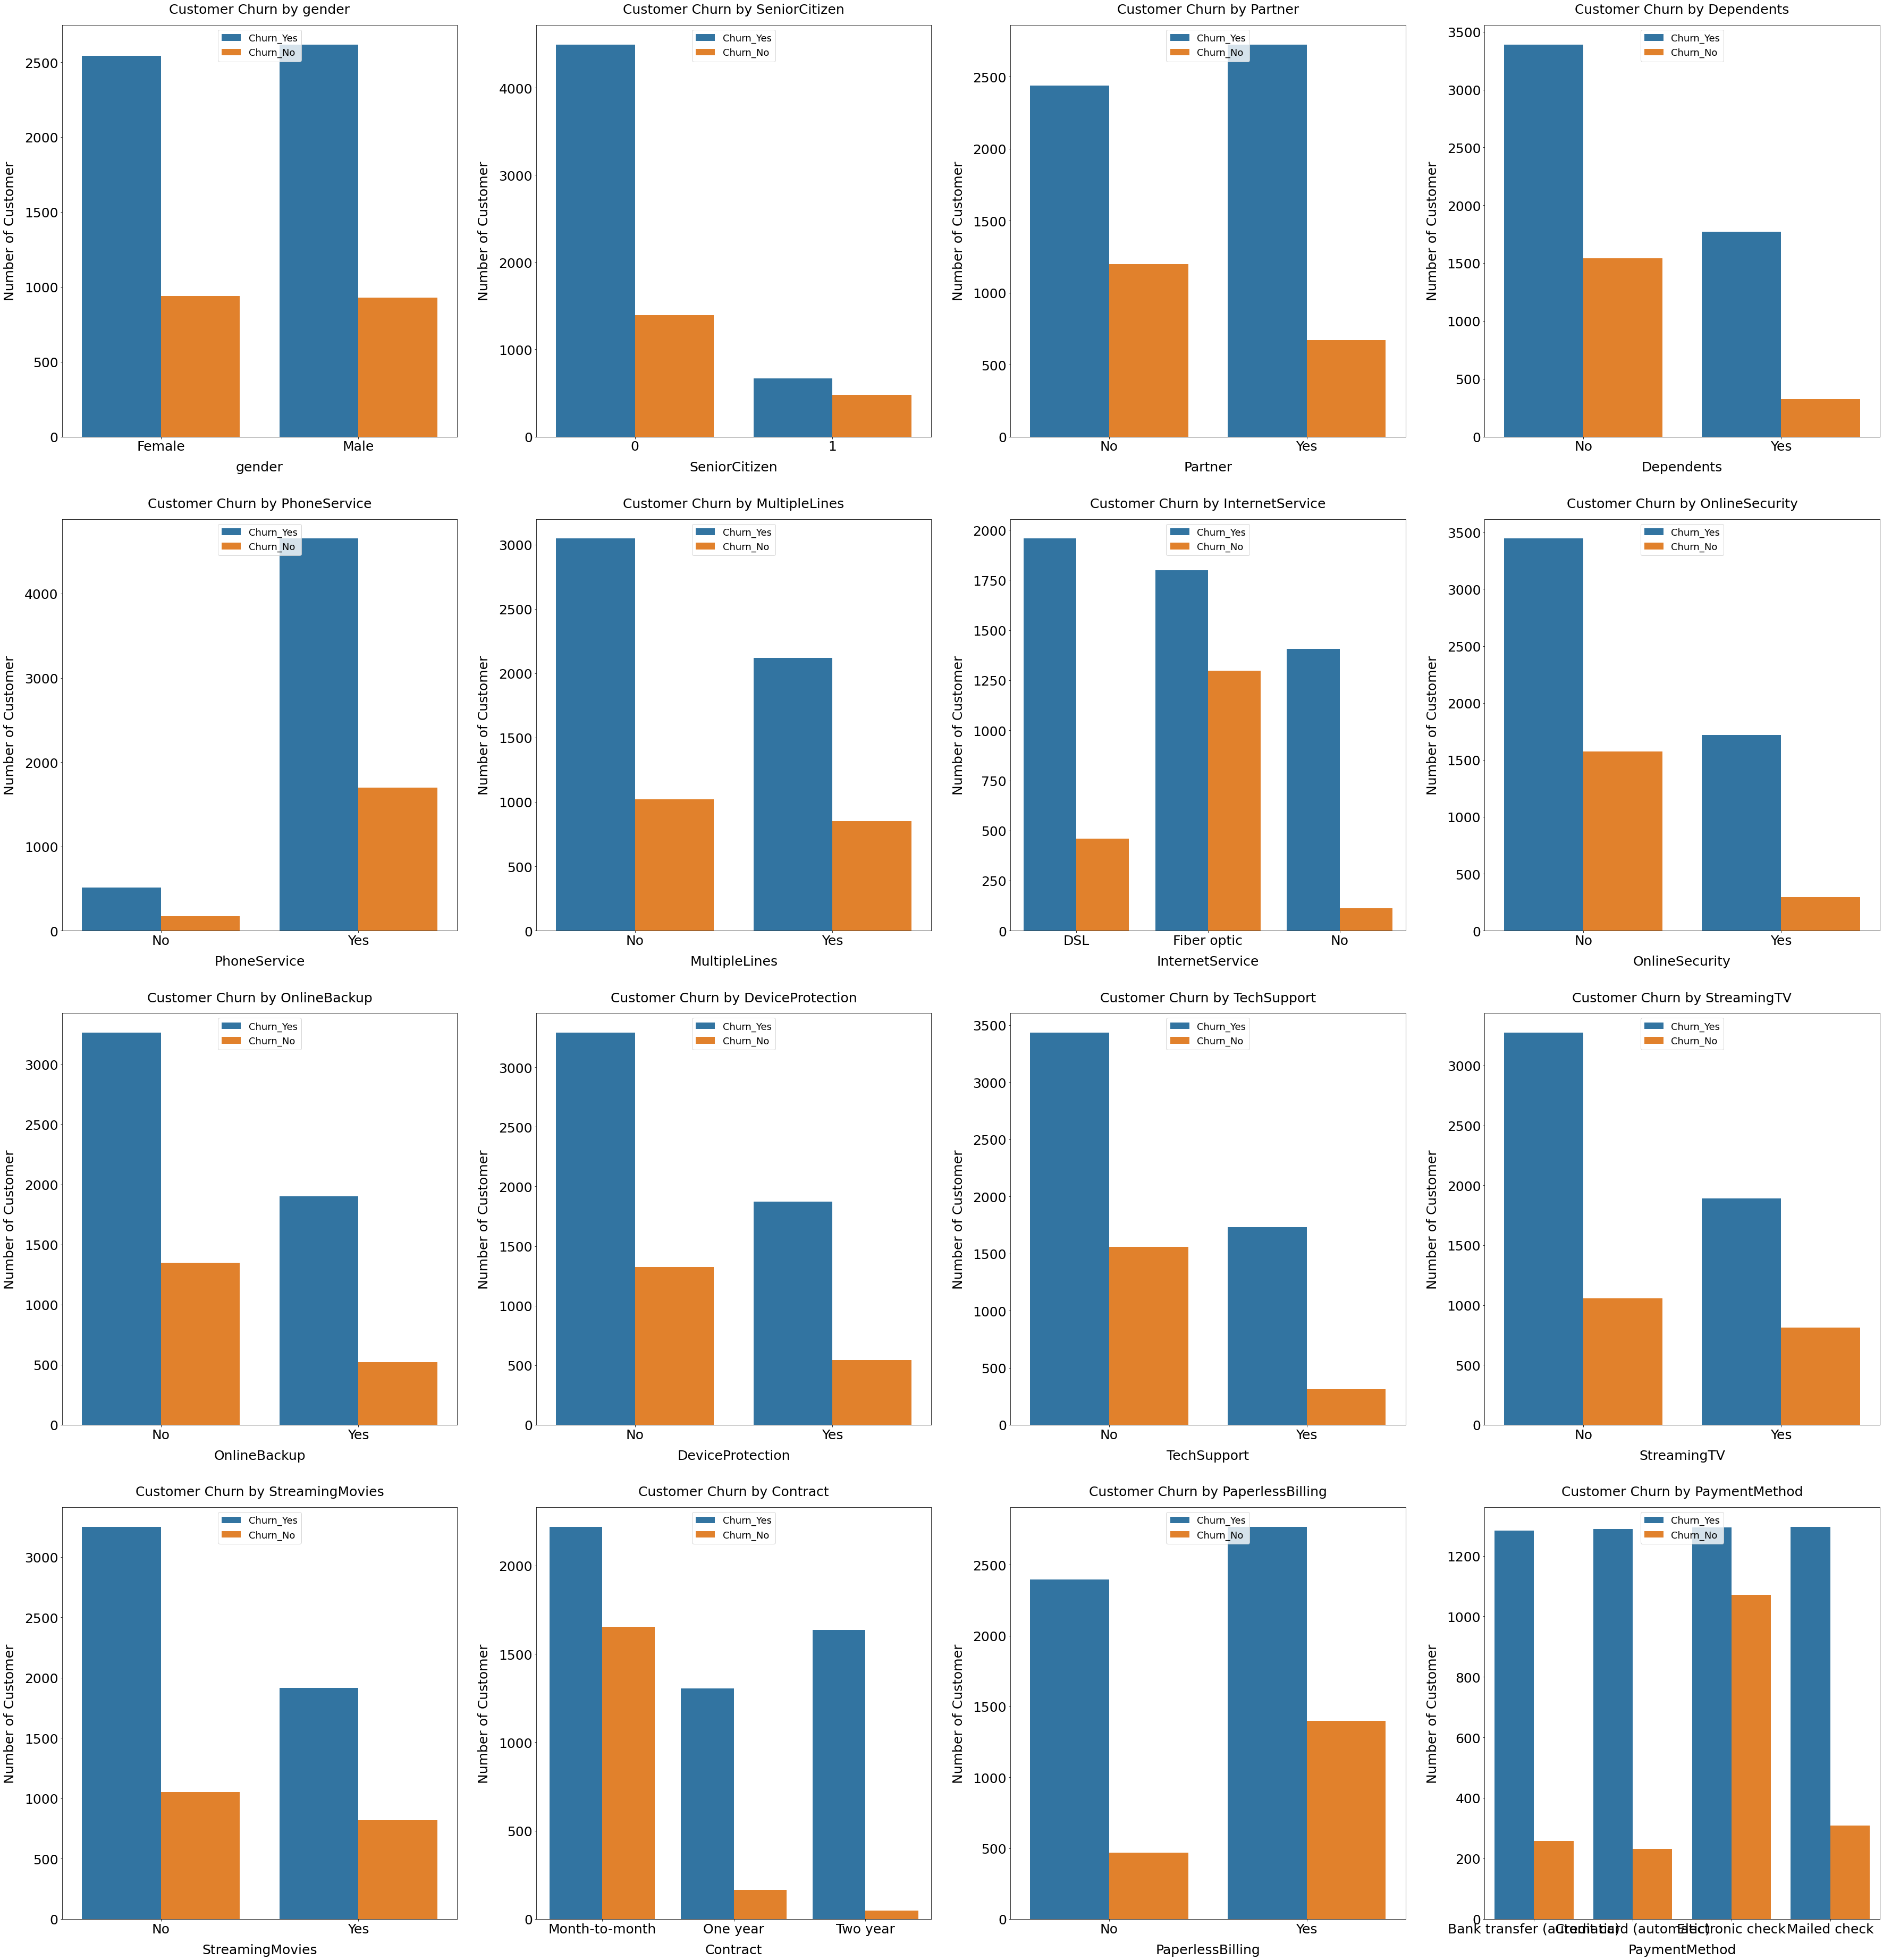

In [42]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 20))
plt.subplots_adjust(right=2.5, top=2.6)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, hue='Churn', data=df1)
    
    plt.xlabel('{}'.format(feature), size=25, labelpad=15)
    plt.ylabel('Number of Customer', size=25, labelpad=15)    
    plt.tick_params(axis='x', labelsize=25)
    plt.tick_params(axis='y', labelsize=25)
    
    plt.legend(['Churn_Yes', 'Churn_No'], loc='upper center', prop={'size': 18})
    plt.title('Customer Churn by {}'.format(feature), size=25, y=1.02)

plt.show()

### 1.6 Correlations

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(),cmap='Blues',annot=False) 

In [ ]:
#Quality correlation matrix
k = 15 #number of variables for heatmap
cols = df1.corr().nlargest(k, 'MonthlyCharges')['MonthlyCharges'].index
cm = df1[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
df_corr = df1.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
# Correlations
corr = df_corr_nd['Correlation Coefficient'] > 0.1
df_corr_nd[corr]

In [ ]:
df1.describe()

In [ ]:
df1.describe(include='category')

In [ ]:
#box plot Churn/Tenure
var = 'Churn'
data = pd.concat([df1['tenure'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 5))
fig = sns.boxplot(x=var, y="tenure", data=data)
fig.axis()

g = sns.FacetGrid(df1, col='Churn')
g.map(plt.hist, 'tenure')

In [ ]:
#box plot Churn/MonthlyCharges
var = 'Churn'
data = pd.concat([df1['MonthlyCharges'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 5))
fig = sns.boxplot(x=var, y="MonthlyCharges", data=data)
fig.axis()

g = sns.FacetGrid(df1, col='Churn')
g.map(plt.hist, 'MonthlyCharges')

In [ ]:
#box plot Churn/TotalCharges
var = 'Churn'
data = pd.concat([df1['TotalCharges'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 5))
fig = sns.boxplot(x=var, y="TotalCharges", data=data)
fig.axis()

g = sns.FacetGrid(df1, col='Churn')
g.map(plt.hist, 'TotalCharges')

In [ ]:
df1.groupby(['Churn', 'gender'])['gender'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df1.groupby(['gender'])['Churn'].apply(lambda x: (x=='Yes').sum()).reset_index(name='count').value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('% Gender Distribution based on Customer Churn')
ax[0].set_ylabel('')
sns.countplot(x='Churn', hue='gender', data=df1, ax=ax[1])
ax[1].set_title('Customer Churn & Gender Distribution')
plt.show()

In [ ]:
# load dataset
df = pd.read_excel("Hours.xls")

# view dataset
print(df)
  
# plot a Stacked Bar Chart using matplotlib
df.plot(
  x = 'Name', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)
  
df_total = df["Studied"] + df["Slept"] + df["Other"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', rotation = 20, fontsize = 8)

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure.reset_index(drop=True).to_list()
np.array(tenure_churn_no, dtype='object')

tenure_churn_yes = df1[df1.Churn=='Yes'].tenure.reset_index(drop=True).to_list()
np.array(tenure_churn_yes, dtype='object')

tenure_churn = df1.tenure.reset_index(drop=True).to_list()
np.array(tenure_churn_no, dtype='object')

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(10,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''

counts, bins, patches = ax.hist(tenure_churn_yes, edgecolor='gray', bins=[0,6,12,18,24,30,36,42,48,54,60,66,72,78], facecolor=perc_50_colour, stacked=True)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(0))
plt.xticks(rotation=70)

# Set the graph title and axes titles
plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Random Numbers', fontsize=15)

# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(tenure_churn_yes, [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
     
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.53 * np.diff(bins) + bins[:-1]
bin_y_centers = 0.05 * ax.get_yticks()[1]

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,} \n".format(counts[i]) + "({0:,.1f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=70, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.27), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=11, bbox=dict(boxstyle="round", fc="white"),
            rotation=90)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels = ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

# Display the graph
plt.show()